# Support Vector Machine Classification 

In [1]:
# Import the necessary modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


## Data Preprocessing


In [2]:
treatment_data = pd.read_csv('C:/Users/USER/Documents/Engineering/BMEN415/classification_data/data-ori.csv')
treatment_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


In [3]:
treatment_data[treatment_data==0].count()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [4]:
treatment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [5]:
def source_num_to_numeric(i):
        if i=='out': return 2
        if i=='in': return 1

treatment_data['SOURCE_NUM'] = treatment_data.SOURCE.apply(source_num_to_numeric)

In [6]:
def sex_num_to_numeric(j):
        if j=='F': return 1
        if j=='M': return 2

treatment_data['SEX_NUM'] = treatment_data.SEX.apply(sex_num_to_numeric)

In [7]:
treatment_data[treatment_data==2].count()

HAEMATOCRIT        0
HAEMOGLOBINS       0
ERYTHROCYTE        0
LEUCOCYTE         10
THROMBOCYTE        0
MCH                0
MCHC               0
MCV                0
AGE               30
SEX                0
SOURCE             0
SOURCE_NUM      2628
SEX_NUM         2290
dtype: int64

In [8]:
treatment_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,SOURCE_NUM,SEX_NUM
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out,2,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out,2,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out,2,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out,2,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in,1,1
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in,1,1
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out,2,1
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in,1,1


In [9]:
x = treatment_data.iloc[:,[0,1,2,3,4,5,6,7,8,12]]

In [10]:
x # Predictors

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX_NUM
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,2
...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,1
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,1
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,1
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,1


In [11]:
y = treatment_data.iloc[:,11:12].values

In [12]:
y # Output - Type of treatment

array([[2],
       [2],
       [2],
       ...,
       [2],
       [1],
       [2]], dtype=int64)

In [13]:
treatment_data.describe() # description of the data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE_NUM,SEX_NUM
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473,1.595648,1.519039
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218,0.490822,0.499694
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000,1.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000,1.000000,1.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000,2.000000,2.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000,2.000000,2.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000,2.000000,2.000000


In [14]:
treatment_data.corr() # correlation of the data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE_NUM,SEX_NUM
HAEMATOCRIT,1.000000,0.973267,0.864989,-0.217218,-0.003562,0.083714,0.108098,0.054948,-0.254799,0.271190,0.274364
HAEMOGLOBINS,0.973267,1.000000,0.818013,-0.208583,-0.045441,0.203248,0.314159,0.105379,-0.239480,0.255793,0.308010
ERYTHROCYTE,0.864989,0.818013,1.000000,-0.186711,0.025879,-0.383666,-0.048313,-0.436041,-0.412858,0.232001,0.246158
LEUCOCYTE,-0.217218,-0.208583,-0.186711,1.000000,0.283262,-0.014840,0.003194,-0.015885,0.191987,-0.137359,0.050660
THROMBOCYTE,-0.003562,-0.045441,0.025879,0.283262,1.000000,-0.138058,-0.198921,-0.075961,0.031064,0.243202,-0.081131
MCH,0.083714,0.203248,-0.383666,-0.014840,-0.138058,1.000000,0.589830,0.931804,0.350166,0.013308,0.077855
MCHC,0.108098,0.314159,-0.048313,0.003194,-0.198921,0.589830,1.000000,0.259672,0.041741,-0.017711,0.203915
MCV,0.054948,0.105379,-0.436041,-0.015885,-0.075961,0.931804,0.259672,1.000000,0.395380,0.022524,0.000262
AGE,-0.254799,-0.239480,-0.412858,0.191987,0.031064,0.350166,0.041741,0.395380,1.000000,-0.109533,0.026647
SOURCE_NUM,0.271190,0.255793,0.232001,-0.137359,0.243202,0.013308,-0.017711,0.022524,-0.109533,1.000000,-0.051795


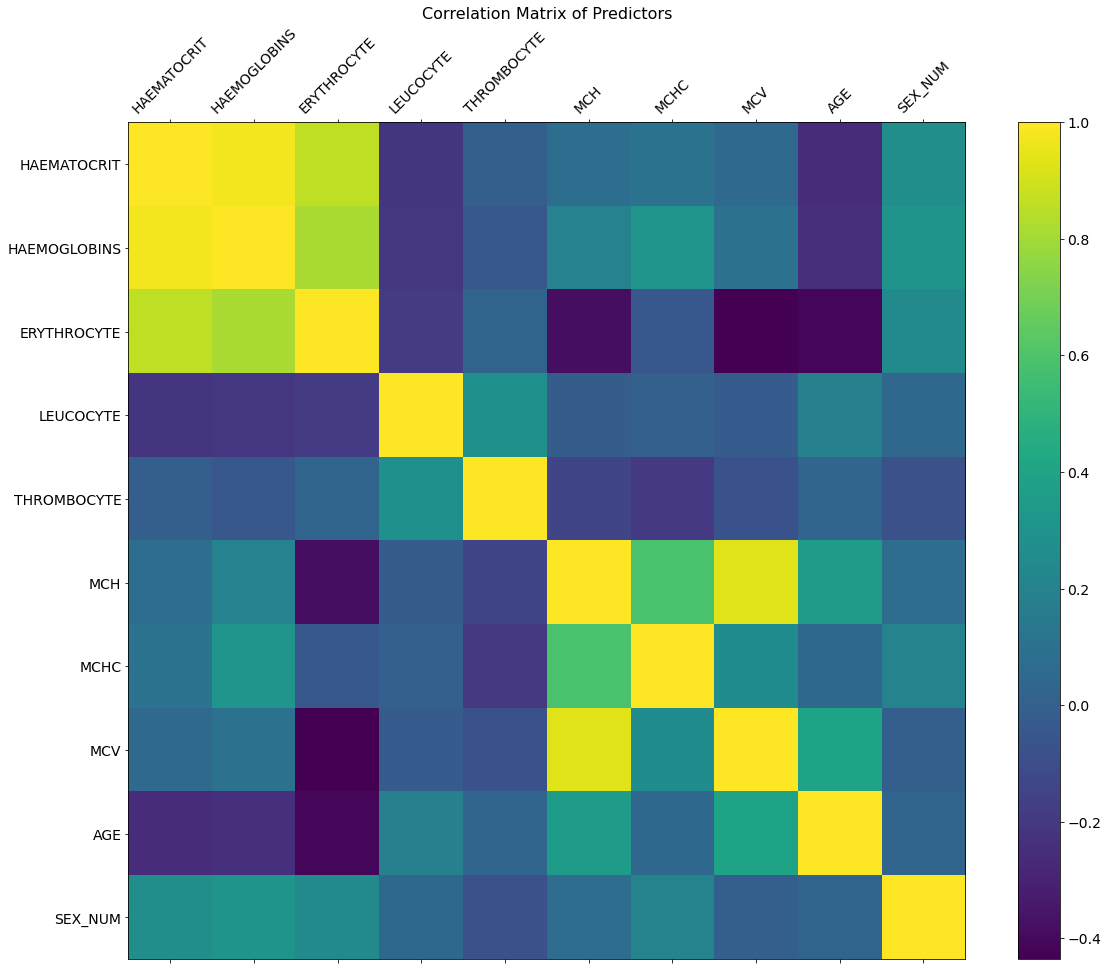

In [15]:
# Correlation Matrix of Predictors
correlation = plt.figure(figsize=(19, 15))
plt.matshow(x.corr(), fignum=correlation.number)
plt.xticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Predictors', fontsize=16);


## Training the Data


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0) 
# splits data, 1/3 of data for testing, 2/3 of data for training

In [17]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train.ravel())
svm.SVC()

SVC()


## Testing the Model


In [18]:
# Predict
y_pred = clf.predict(x_test)

In [19]:
y_pred

array([2, 2, 2, ..., 1, 2, 2], dtype=int64)

In [20]:
y_pred.size

1471

In [21]:
accuracy_score(y_test, y_pred)*100

69.8164513936098

In [22]:
from sklearn import metrics
# Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

0.3018354860639021


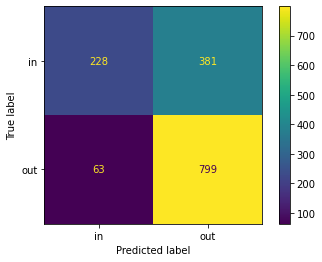

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

name = ['in', 'out']

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=name)

disp.plot()
plt.show()